In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from PIL import Image
import warnings

warnings.filterwarnings('ignore')
np.random.seed(0)
tf.random.set_seed(0)

In [2]:
cwd = 'D:/archive/'
os.listdir(cwd)

['Meta', 'Meta.csv', 'Test', 'Test.csv', 'Train', 'Train.csv']

In [3]:
meta = os.listdir(cwd+'/Meta')
meta

['.~lock.ClassesInformation.ods#',
 '.~lock.ClassesInformationStrong.ods#',
 '0.png',
 '1.png',
 '10.png',
 '11.png',
 '12.png',
 '13.png',
 '14.png',
 '15.png',
 '16.png',
 '17.png',
 '18.png',
 '19.png',
 '2.png',
 '20.png',
 '21.png',
 '22.png',
 '23.png',
 '24.png',
 '25.png',
 '26.png',
 '27.png',
 '28.png',
 '29.png',
 '3.png',
 '30.png',
 '31.png',
 '32.png',
 '33.png',
 '34.png',
 '35.png',
 '36.png',
 '37.png',
 '38.png',
 '39.png',
 '4.png',
 '40.png',
 '41.png',
 '42.png',
 '5.png',
 '6.png',
 '7.png',
 '8.png',
 '9.png']

## Viewing images belonging to each class

plt.figure(figsize=(30,30))
for i, file in enumerate(meta):
    img = Image.open(cwd+"Meta/"+file)
    ax = plt.subplot(9,5,i+1)  #Creating a 9 row 5 column subplot to plot all the images
    ax.imshow(img)
    ax.set_title(file, size=20) #title of each image is set same as file name such as 0.png and so on
    plt.axis('off')
plt.tight_layout()

In [11]:
# Setting the classes as per symbols as it is not already supplied in the dataset
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles',  
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [12]:
train_df = pd.read_csv(cwd+'Train.csv')
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [13]:
train_df.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000
mean,50.835880,50.328930,5.999515,5.962381,45.197302,44.728379,15.788390
std,24.306933,23.115423,1.475493,1.385440,23.060157,21.971145,12.013238
min,25.000000,25.000000,0.000000,5.000000,20.000000,20.000000,0.000000
25%,35.000000,35.000000,5.000000,5.000000,29.000000,30.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,58.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,243.000000,225.000000,20.000000,20.000000,223.000000,205.000000,42.000000


In [14]:
print(f'minimum width: {train_df.Width.min()}')
print(f'minimum height: {train_df.Height.min()}')
print(f'average width: {train_df.Width.mean()}')
print(f'average height: {train_df.Height.mean()}')

minimum width: 25
minimum height: 25
average width: 50.83587951745773
average height: 50.328929582493814


In [15]:
train_x =[]
for i in train_df.Path:
    img = Image.open(cwd+i)       # reading image
    img = img.resize((50,50))     # reasizing image
    train_x.append(np.array(img)) # saving image as array to train

train_y = np.array(train_df.ClassId)
train_x = np.array(train_x)
print(train_x.shape)
print(train_y.shape)

(39209, 50, 50, 3)
(39209,)


In [16]:
test_df = pd.read_csv(cwd+'Test.csv')
test_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [17]:
test_x =[]
for i in test_df.Path:
    img = Image.open(cwd+i)
    img = img.resize((50,50))
    test_x.append(np.array(img))

test_y = np.array(test_df.ClassId)
test_x = np.array(test_x)
print(test_x.shape)
print(test_y.shape)

(12630, 50, 50, 3)
(12630,)


Dangerous curve right


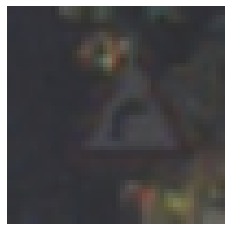

In [18]:
print(classes[train_y[2]])
plt.imshow(train_x[2])
plt.axis('off')
plt.show()

In [19]:
## Normalization

xtrain = train_x/255
xtest = test_x/255


# One Hot encoding

ytrain = keras.utils.to_categorical(train_y)
ytest = keras.utils.to_categorical(test_y)

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xvalid, ytrain, yvalid = train_test_split(xtrain, ytrain, test_size=0.2, random_state=0)
print(xtrain.shape)
print(xvalid.shape)
print(ytrain.shape)
print(yvalid.shape)

(31367, 50, 50, 3)
(7842, 50, 50, 3)
(31367, 43)
(7842, 43)


In [22]:
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

model = keras.models.Sequential()
model.add(Conv2D(filters=32, kernel_size= (5,5), strides=2, activation='relu', padding='same', input_shape=(50,50,3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), strides=2, activation='relu', padding='same'))
model.add(MaxPool2D((2,2), padding='valid'))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5,5), strides=2, activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(5,5), strides=2, activation='relu', padding='same'))
model.add(MaxPool2D((2,2), padding='valid'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(43, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 64)          102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 64)          0

In [23]:
keras.utils.plot_model(model)
# Compiling the CNN model
model.compile(optimizer='sgd',
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [24]:
earlystop_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights =True)

model_history = model.fit(xtrain,ytrain, epochs=200,
                         validation_data=(xvalid,yvalid),
                         callbacks=[earlystop_cb])

Epoch 1/200
981/981 [==============================] - 27s 27ms/step - loss: 3.5654 - accuracy: 0.0633 - val_loss: 3.4719 - val_accuracy: 0.0819
Epoch 2/200
981/981 [==============================] - 28s 28ms/step - loss: 3.3808 - accuracy: 0.1122 - val_loss: 3.0952 - val_accuracy: 0.2082
Epoch 3/200
981/981 [==============================] - 23s 24ms/step - loss: 2.4912 - accuracy: 0.3046 - val_loss: 1.9482 - val_accuracy: 0.4032
Epoch 4/200
981/981 [==============================] - 22s 23ms/step - loss: 1.4777 - accuracy: 0.5439 - val_loss: 1.1473 - val_accuracy: 0.6544
Epoch 5/200
981/981 [==============================] - 21s 22ms/step - loss: 1.0251 - accuracy: 0.6718 - val_loss: 0.7076 - val_accuracy: 0.7706
Epoch 6/200
981/981 [==============================] - 22s 23ms/step - loss: 0.8008 - accuracy: 0.7424 - val_loss: 0.4382 - val_accuracy: 0.8610
Epoch 7/200
981/981 [==============================] - 20s 20ms/step - loss: 0.6433 - accuracy: 0.7934 - val_loss: 0.3970 - val_ac

In [25]:
loss, accuracy = model.evaluate(xtest,ytest)
print(f'Loss = {loss:.2f}\naccuracy = {accuracy*100:.2f}%')

395/395 [==============================] - 1s 4ms/step - loss: 0.3290 - accuracy: 0.9264
Loss = 0.33
accuracy = 92.64%


In [26]:
prob = model.predict(xtest)
pred = np.argmax(prob, axis=-1)

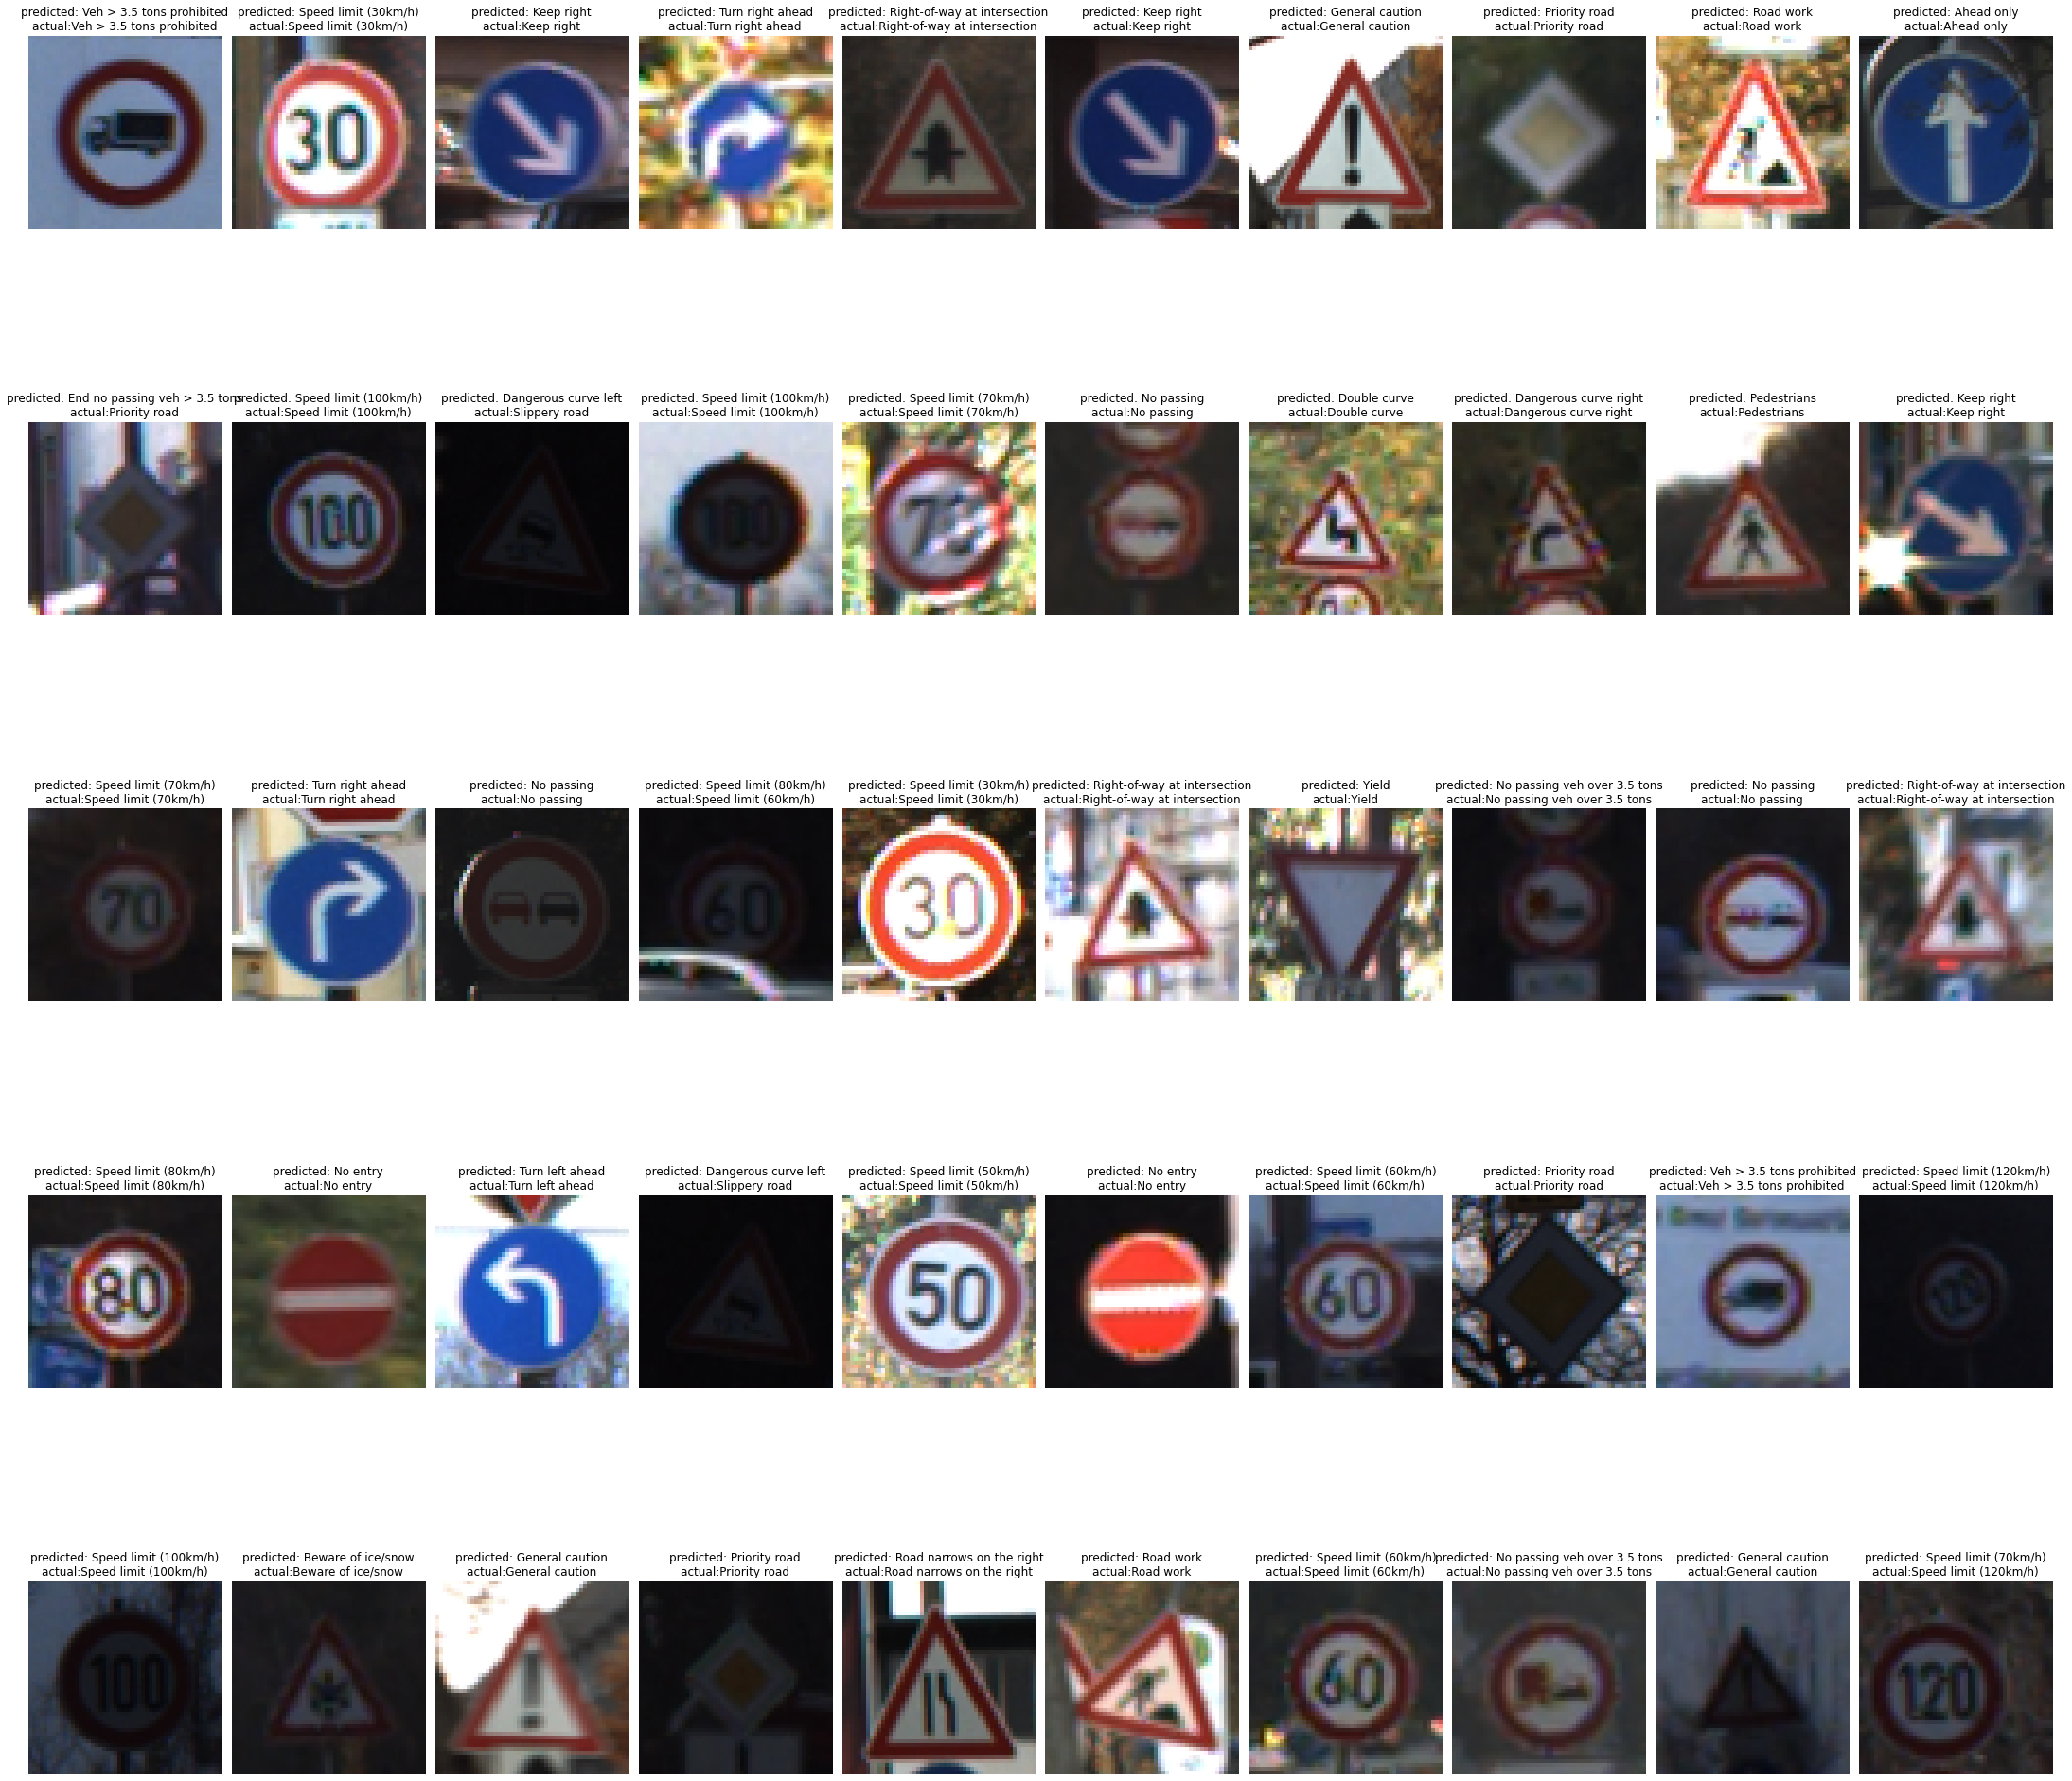

In [27]:
plt.figure(figsize=(30,30))
for i in range(50):
    ax = plt.subplot(5,10,i+1)
    ax.imshow(xtest[i])
    ax.set_title(f'predicted: {classes[pred[i]]}\nactual:{classes[test_y[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()